In [1]:
# %load_ext nb_black

import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn import metrics as m
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

warnings.filterwarnings("ignore")
randomseed = 7

Using TensorFlow backend.


In [2]:
data1 = pd.read_csv("NextYearData_actualData_train.txt")
data2 = pd.read_csv("ThisYearData_actualData_train.txt")
data3 = pd.read_csv("ThisYearData_actualData_test.txt")

data4 = pd.read_csv("NextYearData_actualData_test.txt")

data5 = pd.read_csv("Predicted_NextYearData.txt")

data = pd.concat([data1, data2, data3])

print(data.shape)
data.head()

(66090, 18)


,Unnamed: 0,FIELD_1,FIELD_2,L100700,S000300,L101700,L100800,L103300,L103100,FIELD_33,FIELD_38,FIELD_40,SEX,AGE,L102900,L103200,L103000,CLASS
0,0,822254,20171016,5.5,21.7,70.0,89.0,4.4,53.0,2.0,1.0,1.0,0.0,45.0,231.0,161.0,85.0,1
1,1,648437,20160702,5.0,20.8,13.0,94.0,2.8,51.0,1.0,0.0,4.0,1.0,39.0,145.0,76.0,88.0,0
2,2,1057688,20140809,3.9,19.2,16.0,101.0,5.4,42.0,1.0,0.0,1.0,1.0,50.0,227.0,165.0,102.0,1
3,3,773551,20171116,6.8,25.3,15.0,110.0,2.7,60.0,2.0,1.0,2.0,0.0,43.0,163.0,92.0,54.0,0
4,4,344797,20151224,6.8,29.0,44.0,92.0,4.6,41.0,3.0,3.0,1.0,0.0,31.0,190.0,101.0,239.0,1


In [3]:
data=data[['L100700','S000300','L101700','L100800','L103300','L103100','FIELD_33','FIELD_38','FIELD_40','SEX','AGE','CLASS']]
xtrain, xtest, ytrain, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], random_state=42, test_size=0.3)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=randomseed,
    n_estimators=1000,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=8,
)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

0.8582740707116558


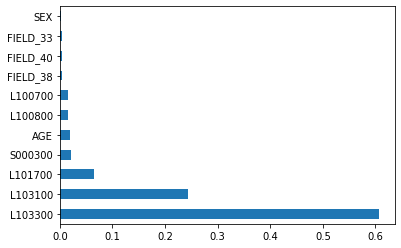

Index(['L103300', 'L103100', 'L101700', 'S000300', 'AGE', 'L100800', 'L100700',
       'FIELD_38', 'FIELD_40', 'FIELD_33', 'SEX'],
      dtype='object')


In [14]:
ypred = rf.predict(xtest)

score = rf.score(xtest, ytest)
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=xtest.columns)
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)

In [15]:
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

confmatrx = pd.DataFrame(m.confusion_matrix(ytest, ypred))
confmatrx.head()

Accuracy on training set: 0.883
Accuracy on test set: 0.858


,0,1
0,7661,1277
1,1533,9356


In [16]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      8938
           1       0.88      0.86      0.87     10889

    accuracy                           0.86     19827
   macro avg       0.86      0.86      0.86     19827
weighted avg       0.86      0.86      0.86     19827



In [17]:
# import xgboost as xgb
# from sklearn import metrics as m

# xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=randomseed)

# xgb_model.fit(xtrain, ytrain)

# y_pred = xgb_model.predict((xtest))

# print("accuracy \t", m.accuracy_score(ytest, y_pred))
# confmatrx = pd.DataFrame(m.confusion_matrix(ytest, y_pred))
# confmatrx.head()

In [18]:
# print(classification_report(ytest, y_pred))

In [35]:
data4=data4[['L100700','S000300','L101700','L100800','L103300','L103100','FIELD_33','FIELD_38',
             'FIELD_40','SEX','AGE','CLASS']]

pred4 = rf.predict((data4.iloc[:, :-1]))

print(m.accuracy_score(data4.iloc[:, -1], pred4))

confmatrx = pd.DataFrame(m.confusion_matrix(data4.iloc[:, -1], pred4))
confmatrx

0.9176097393689986


,0,1
0,4742,473
1,488,5961


In [33]:
print(classification_report(data4.iloc[:, -1], pred4))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      5215
           1       0.93      0.92      0.93      6449

    accuracy                           0.92     11664
   macro avg       0.92      0.92      0.92     11664
weighted avg       0.92      0.92      0.92     11664



In [19]:
# =====================================
# =====================================
# =====================================
# =====================================

data5=data5[['P_L100700','P_S000300','P_L101700','P_L100800','P_L103300','P_L103100','P_FIELD_33','P_FIELD_38',
             'P_FIELD_40','P_SEX','P_AGE','CLASS']]
pred5 = rf.predict((data5.iloc[:, :-1]))



print(m.accuracy_score(data5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(data5.iloc[:, -1], pred5))
confmatrx

0.77889231824417


,0,1
0,3747,1468
1,1111,5338


In [20]:
print(classification_report(data5.iloc[:, -1], pred5))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      5215
           1       0.78      0.83      0.81      6449

    accuracy                           0.78     11664
   macro avg       0.78      0.77      0.77     11664
weighted avg       0.78      0.78      0.78     11664



In [12]:
# ========================================================

In [21]:
print(xtrain.shape)

(46263, 11)


In [22]:
print(xtest.shape)

(19827, 11)


In [23]:
data5.shape

(11664, 12)

In [36]:
data.to_csv('_train.txt',sep=',')

In [37]:
data4.to_csv('_test.txt',sep=',')

In [38]:
data5.to_csv('_PredictedNextYearTest.txt',sep=',')

In [30]:
data4.head()

,Unnamed: 0,FIELD_1,FIELD_2,L100700,S000300,L101700,L100800,L103300,L103100,FIELD_33,FIELD_38,FIELD_40,SEX,AGE,L102900,L103200,L103000,CLASS
0,0,1071928,20141120,5.8,25.9,19.0,96.0,4.4,58.0,1.0,1.0,1.0,1.0,50.0,253.0,178.0,86.0,1
1,1,938071,20140528,6.1,23.8,36.0,83.0,3.4,41.0,2.0,2.0,0.0,0.0,45.0,140.0,89.0,51.0,0
2,2,2686302,20151031,6.1,24.9,43.0,96.0,5.2,44.0,3.0,2.0,1.0,0.0,35.0,227.0,145.0,190.0,1
3,3,840189,20150706,6.2,25.0,21.0,100.0,5.4,35.0,2.0,1.0,0.0,0.0,43.0,189.0,98.0,281.0,1
4,4,1254540,20140718,4.5,24.1,61.0,106.0,5.2,36.0,1.0,1.0,1.0,0.0,65.0,186.0,131.0,95.0,1
